In [24]:
#Importing Lib

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Reading Dataset
df = pd.read_csv("E:\\DSCT\\All data\\fake-news US Dataset\\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
#Basic ops like balancing etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [27]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

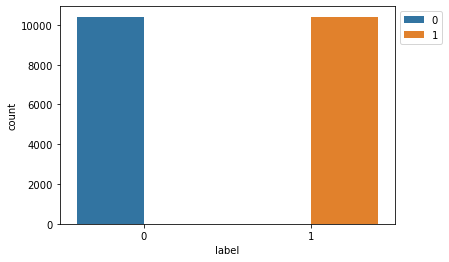

In [28]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [29]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [30]:
df = df[['id','title','label']]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 487.6+ KB


In [32]:
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


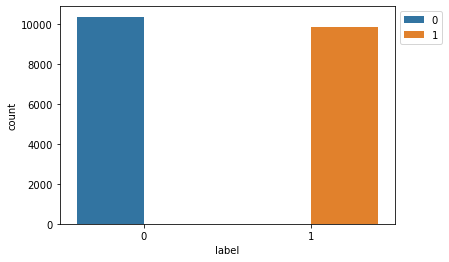

In [34]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [35]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [36]:
#splitting dataset into 80:20 and performing all ops on df_80 dataset and keeping df_20 dataset for test.

In [37]:
df_80 = df.sample(frac=0.8)

In [38]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16194 entries, 11263 to 20734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16194 non-null  int64 
 1   title   16194 non-null  object
 2   label   16194 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.1+ KB


In [39]:
df_20 = df.drop(df_80.index)

In [40]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048 entries, 5 to 20796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4048 non-null   int64 
 1   title   4048 non-null   object
 2   label   4048 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 126.5+ KB


In [41]:
df_20.head()

,id,title,label
5,5,Jackie Mason: Hollywood Would Love Trump if He...,0
13,13,US Officials See No Link Between Trump and Russia,1
17,17,Anonymous Donor Pays $2.5 Million To Release E...,1
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,1
25,25,Nukes and the UN: a Historic Treaty to Ban Nuc...,1


# creating objects from classses


In [42]:
stemmer = PorterStemmer()
lemmitizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
df_80.reset_index(inplace = True)

# cleaning data using lemmetizer

In [43]:
corpus=[]
for i in range(len(df_80)):
    sent = re.sub('[^a-zA-Z]',' ',df_80['title'][i])
    sent =  sent.lower()
    sent=" ".join([lemmitizer.lemmatize(word) for word in str(sent).split()])
    sent = " ".join([word for word in str(sent).split() if(word not in stop_words)])
    corpus.append(sent)
    
corpus

['afghan vice president seen abducting rival new york time',
 'obama cementing new tie cuba lift limit cigar rum new york time',
 'truth u government doe want know war syria',
 'huma abedin swore oath gave device state dept email',
 'bundy family redeemed guilty verdict oregon case',
 'call politics new ghostbusters new york time',
 'baking soda honey remedy destroys even severe disease',
 'trump say alec baldwin impression unfair portraying someone mean nasty video',
 'requires police hide hemisphere phone spying',
 'wrong planet saudi arabia reelected un human right council',
 'new york philharmonic coup deborah borda named new leader new york time',
 'donald trump hero common man',
 'gainor left wing medium smear anti sharia march',
 'shaun king really mad president trump first budget breitbart',
 'bernie sander term surrender new york time',
 'living death capitalism',
 'schumer without special prosecutor everyone rightly suspect comey firing wa part cover breitbart',
 'getting min

# converting data into numbers using TFIDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X  = cv.fit_transform(corpus).toarray()

y=df_80['label']

In [45]:
temp_df = pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

,ab,abandon,abandoned,abbas,abc,abducted,abduction,abe,abedin,able,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# train test split

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 3)

In [47]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (12955, 5000)
X_test: (3239, 5000)
y_train: (12955,)
y_test: (3239,)


# model evaluation

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def model_Eval(y_test,y_pred):
    
    #Step 1: Accuacy, Error, PS, RS, F1S:
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of model is:",acc)
    print("Error in model is: ",1-acc)
    print("Precision score of model is: ",precision_score(y_test,y_pred,average='weighted'))
    print("Recall score of model is: ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score of model is: ",f1_score(y_test,y_pred,average='weighted'))
    print()

    #Step 2: Confusion Matrix:
    print("____Confusion Matric____")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

    #Step 3: Heatmap: 

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


LogisticRegression Score: 0.92405063
Accuracy of model is: 0.9240506329113924
Error in model is:  0.07594936708860756
Precision score of model is:  0.9302303902256136
Recall score of model is:  0.9240506329113924
F1 Score of model is:  0.9239391489044818

____Confusion Matric____
[[1456  218]
 [  28 1537]]
-------------------------------------------------------------
GaussianNB Score: 0.77462180
Accuracy of model is: 0.77462179685088
Error in model is:  0.22537820314912005
Precision score of model is:  0.7745706878117058
Recall score of model is:  0.77462179685088
F1 Score of model is:  0.7745462611544446

____Confusion Matric____
[[1322  352]
 [ 378 1187]]
-------------------------------------------------------------
KNeighborsClassifier Score: 0.50447669
Accuracy of model is: 0.5044766903365236
Error in model is:  0.49552330966347635
Precision score of model is:  0.7117634022449598
Recall score of model is:  0.5044766903365236
F1 Score of model is:  0.36362024960991585

____Confusion

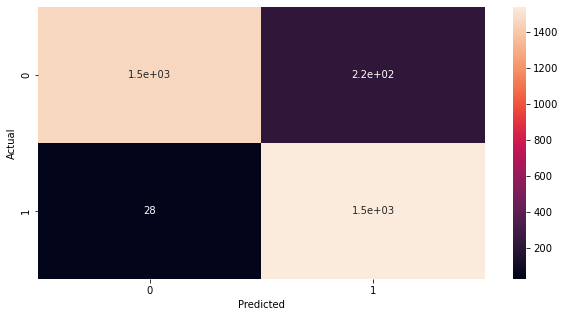

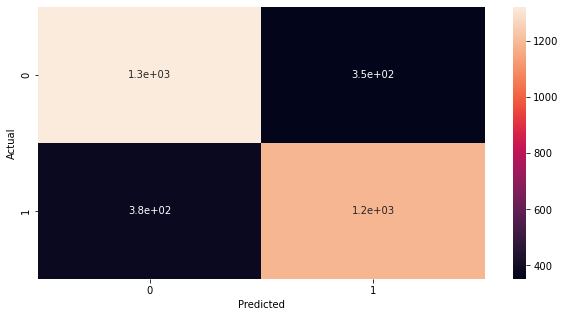

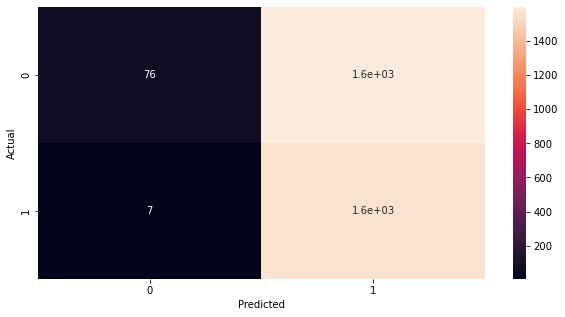

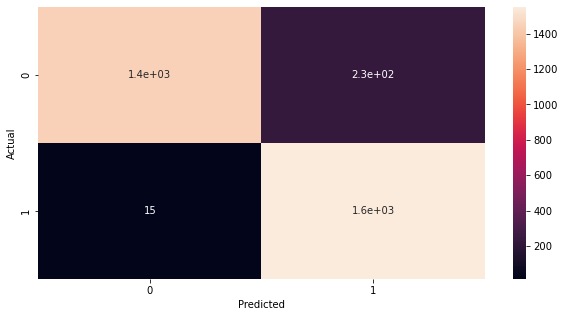

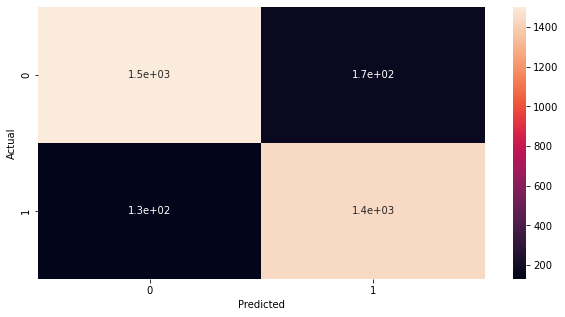

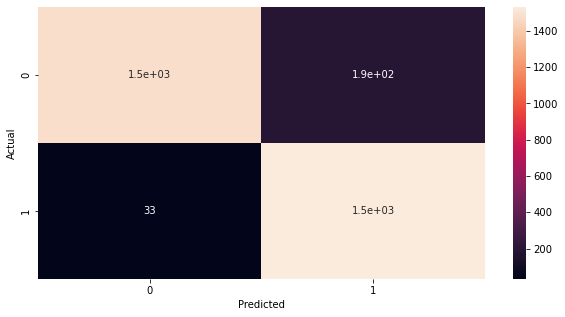

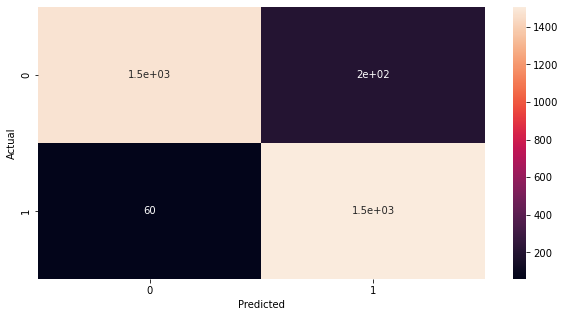

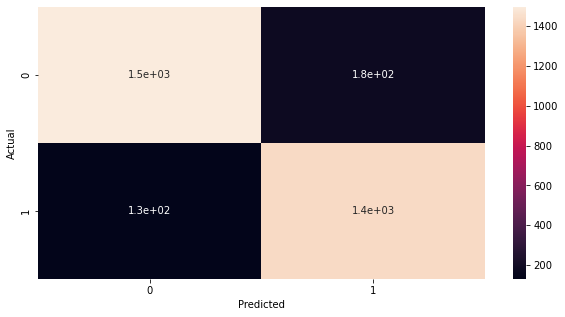

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(name, "Score: {:.8f}".format(acc))
    model_Eval(y_test,y_pred)
    print("-------------------------------------------------------------")

# KNN

52.608829885767214
Accuracy of model is: 0.5260882988576722
Error in model is:  0.47391170114232783
Precision score of model is:  0.7200511641578881
Recall score of model is:  0.5260882988576722
F1 Score of model is:  0.40873140521693235

____Confusion Matric____
[[ 152 1522]
 [  13 1552]]


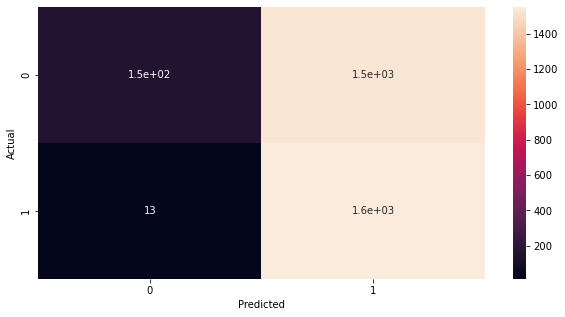

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Final Model for k=3
 #Step 1: Creating Model
ML_Model = KNeighborsClassifier(n_neighbors=3,p=2)

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# GNB

Model created
77.46217968508799
Accuracy of model is: 0.77462179685088
Error in model is:  0.22537820314912005
Precision score of model is:  0.7745706878117058
Recall score of model is:  0.77462179685088
F1 Score of model is:  0.7745462611544446

____Confusion Matric____
[[1322  352]
 [ 378 1187]]


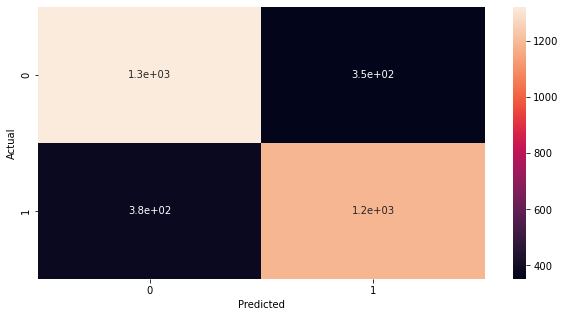

In [51]:
from sklearn.naive_bayes import GaussianNB

ML_Model = GaussianNB()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# SVM

Accuracy of model is: 0.9302253782031491
Error in model is:  0.0697746217968509
Precision score of model is:  0.9351227104021766
Recall score of model is:  0.9302253782031491
F1 Score of model is:  0.9301594333336408

____Confusion Matric____
[[1477  197]
 [  29 1536]]


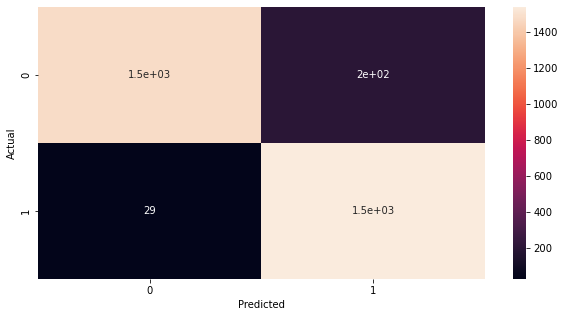

In [52]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

svm_Model = SVC(kernel='linear')
svm_Model.fit(X_train,y_train)
y_pred = svm_Model.predict(X_test)
# acc= svm_Model.score(y_pred,y_test)
# print(acc*100)
model_Eval(y_test,y_pred)

# Decision Tree

Model created
90.6143871565298
Accuracy of model is: 0.906143871565298
Error in model is:  0.09385612843470204
Precision score of model is:  0.9063199308767671
Recall score of model is:  0.906143871565298
F1 Score of model is:  0.9061641743437922

____Confusion Matric____
[[1508  166]
 [ 138 1427]]


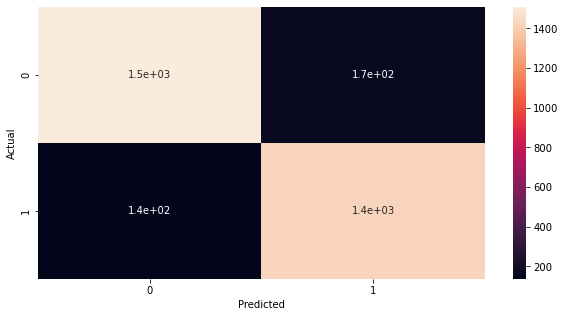

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ML_Model = DecisionTreeClassifier()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Adaboost

Model created
92.00370484717504
Accuracy of model is: 0.9200370484717505
Error in model is:  0.0799629515282495
Precision score of model is:  0.9233713357409561
Recall score of model is:  0.9200370484717505
F1 Score of model is:  0.920005262153057

____Confusion Matric____
[[1475  199]
 [  60 1505]]


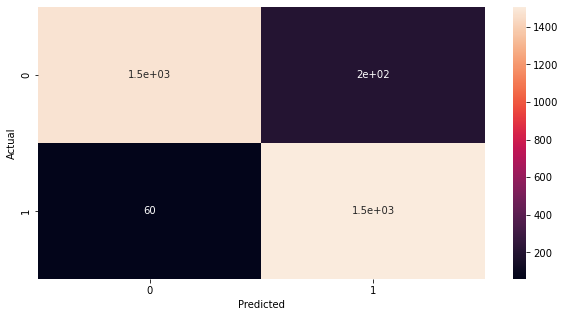

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ML_Model = AdaBoostClassifier(random_state=96)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Logistic regression

92.40506329113924
Accuracy of model is: 0.9240506329113924
Error in model is:  0.07594936708860756
Precision score of model is:  0.9302303902256136
Recall score of model is:  0.9240506329113924
F1 Score of model is:  0.9239391489044818

____Confusion Matric____
[[1456  218]
 [  28 1537]]


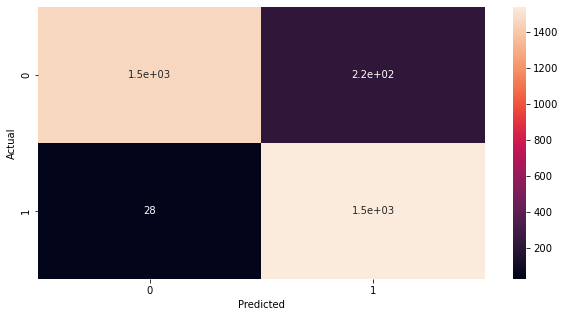

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
add_model = LogisticRegression()
add_model.fit(X_train,y_train)
y_pred = add_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# RandomForest

Model created
87.12565606668726
Accuracy of model is: 0.8712565606668725
Error in model is:  0.12874343933312749
Precision score of model is:  0.8739629377053021
Recall score of model is:  0.8712565606668725
F1 Score of model is:  0.8712248985844018

____Confusion Matric____
[[1401  273]
 [ 144 1421]]


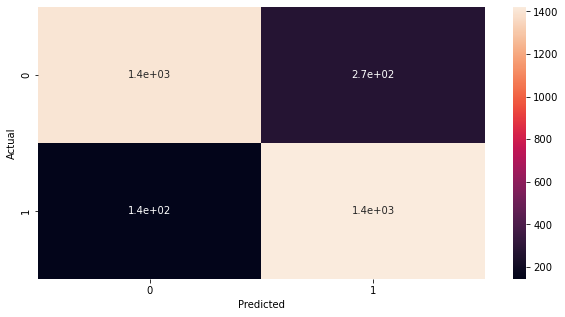

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML_Model = RandomForestClassifier(max_depth=2)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# save the model

In [57]:
import joblib
joblib.dump(cv,"CVFakeNewsClassifierLemm02U.pkl")
joblib.dump(add_model,"FakeNewsClassifierLemm02U.pkl")

['FakeNewsClassifierLemm02U.pkl']